In [37]:
%matplotlib inline
#import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
#from pandas_datareader import data as pdr
from bs4 import BeautifulSoup

# Задание 1.

Вы - менеджер по продажам в нефтехимической компании. Вы ведете несколько ключевых клиентов, которые закупают продукты вашей компании. Ваша компания запускает новый продукт - "Волшебный белый порошок" (ВБП), который по своим свойствам похож на тот, что уже есть на рынке. Ваши клиенты предпочитают формульный подход к ценообразованию. Вам нужно предложить клиентам формулу расчета цены на ВБП. В зависимости от объемов, которые покупают клиенты, им может быть предложена скидка.

### Дополнительные вводные:

Так как продукт Б новый, возможно стоит предложить дисконт от цены Продукта А. Продукт производиться из нефти. Один из известных способов производства предполагает что из 16 баррелей нефти сделают одну тонну ВБП, а затраты на производство в районе 400 евро.

In [2]:
# Из данных есть:
# Цены на продукт А, который уже есть на рынке Европы
# ----- октябрь 2018 - 
# ----- ноябрь 2018 - 
# ----- февраль 2019 -

# Котировки нефти, курс eur/usd
#dbc = pd.read_excel('cur_oil.xlsx')
#dbc=pd.read_csv('cur_oil')

#dbc
# Затраты на производство
PRODUCTION_COST = 400 # (EUR)

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

# * Справочная информация по клиентам(объемы, локации, комментарии) 
customers = {
    'Monty':{
        'location':'EU',
        'volumes':200,
        'comment':'moving_average'
    },
    
    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'comment': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'comment': 'moving_average'
    },
    'Poly':{
        'location':'EU',
        'volumes': 70,
        'comment': 'monthly'
    
    },'Russian':{
        'location':'RU',
        'volumes': 10,                  #Клиенту из RUS  предлагаем пробную партию 10 тонн на условиях FCA
        'comment': 'monthly'
    
    }
    }



# Скидки
#discounts = {'up to 100': 0.01, # 1%
            # 'up to 300': 0.05, # 5%
             #'300 plus': 0.1}   #10%


In [38]:
#СПРАВОЧНИК -ТОЛЬКО В ЭТОМ БЛОКЕ ВОЗМОЖНО ИЗМЕНЕНИЕ ПАРАМЕТРОВ

customers = {
    'Monty':{
        'location':'EU',
        'volumes':200,
        'comment':'moving_average'
    },
    
    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'comment': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'comment': 'moving_average'
    },
    'Poly':{
        'location':'EU',
        'volumes': 70,
        'comment': 'monthly'
    
    },'Russian':{
        'location':'RU',
        'volumes': 10,                  #Клиенту из RUS  предлагаем пробную партию 10 тонн на условиях FCA
        'comment': 'monthly'
    
    }
    }

PRODUCTION_COST = 400 # (EUR) затраты на производство 1 тонны продукта VBP в EUR
RAW_MAT=16 #  расход сырья на 1 тонну продукта VBP (1 тонна продукта VBP=16 барелей нефти)

EU_LOGISTIC_COST_EUR = 30 # затраты на логистику на условиях поставки  DDP в Европу в евро
CN_LOGISTIC_COST_USD = 130 # затраты на логистику на условиях поставки  DDP в Китай  в долларах



discounts = {100: 0.01, # 1% up to 100'
             300: 0.05, # 5% up to 300
             301: 0.1}   #10% 300 plus'
K_EUR=72.0882   #Курс Евро на дату предложения продукта VBP  30.04.2019
K_USD =64.7053   #Курс доллара на дату предложения продукта VBP  30.04.2019
dbc=64.94   #Котировка 1 барреля нефти к рублю на дату предложения продукта VBP  30.04.2019
NP=0.15  #*Размер min прибыли предприятия, заложенной в цену 1 тонны продукта  для данного расчета, как 15%  от себестоимости продукта
#(проведен анализ размера min прибыли в среднем по отрасли). 

#*Только для данного расчета

In [39]:
print(discounts)

{100: 0.01, 300: 0.05, 301: 0.1}


In [40]:
# ФОРМУЛЫ РАСЧЕТА ПРОМЕЖУТЛОЧНЫХ ПОКАЗАТЕЛЕЙ ДЛЯ РАСЧЕТА СТОИМОСТИ 1 tn ПРОДУКТА VBP НА УСЛОВИЯХ FCA, DDP ЕВРОПА, DDP КИТАЙ
#*****ЗДЕСЬ И ДАЛЕЕ - РАСЧЕТ СТОИМОСТИ 1 tn ПРОДУКТА VBP

C_RAW_MAT=RAW_MAT*dbc  #ЗАТРАТЫ НА СЫРЬЕ ДЛЯ ПРОИЗВОДСТВА 1 ТОННЫ ПРОДУКТА VBP В РУБЛЯХ
print(C_RAW_MAT)
PRODUCTION_COST_R=PRODUCTION_COST*K_EUR #затраты на производство 1 тонны продукта VBP  в рублях
print(round(PRODUCTION_COST_R,1))
EU_LOGISTIC_COST_R=EU_LOGISTIC_COST_EUR*K_EUR #затраты на логистику на условиях поставки  DDP в Европу в рублях на 1 тн пр VBP
print(round(EU_LOGISTIC_COST_R,1))
CN_LOGISTIC_COST_R=CN_LOGISTIC_COST_USD*K_USD #затраты на логистику на условиях поставки  DDP в Китай  в рублях на 1 тн пр VBP
print(round(CN_LOGISTIC_COST_R,1))

1039.04
28835.3
2162.6
8411.7


In [41]:
#ФОРМУЛЫ РАСЧЕТА СТОИМОСТИ 1 tn ПРОДУКТА VBP НА УСЛОВИЯХ FCA, DDP ЕВРОПА, DDP КИТАЙ БЕЗ УЧЕТА ДИСКОНТА

PRICE_FCA=C_RAW_MAT+PRODUCTION_COST_R+(C_RAW_MAT+PRODUCTION_COST_R)*NP 
print(round(PRICE_FCA,1))   

#базовая формула цены за 1 tn  продукта VBP на условиях DPP поставка в Европу в руб.
PRICE_DDP_E=PRICE_FCA+EU_LOGISTIC_COST_R 
print(round(PRICE_DDP_E,1))

#базовая формула цены за 1 tn  продукта VBP на условиях DPP поставка в Китай в руб.
PRICE_DDP_CN=PRICE_FCA+CN_LOGISTIC_COST_R 
print(round(PRICE_DDP_CN,1))

34355.5
36518.1
42767.2


In [42]:
#ФУНКЦИИ СТАТИЧЕСКИЙ БЛОК:

#ФУНКЦИЯ РАСЧЕТА ЦЕНЫ FCA БЕЗ УЧЕТА ДИСКОНТА

def FCA(RAW_MAT,dbc,PRODUCTION_COST,K_EUR,NP):
    C_RAW_MAT=RAW_MAT*dbc  #ЗАТРАТЫ НА СЫРЬЕ ДЛЯ ПРОИЗВОДСТВА 1 ТОННЫ ПРОДУКТА VBP В РУБЛЯХ
    PRODUCTION_COST_R=PRODUCTION_COST*K_EUR #затраты на производство 1 тонны продукта VBP  в рублях
    PRICE_FCA=C_RAW_MAT+PRODUCTION_COST_R+(C_RAW_MAT+PRODUCTION_COST_R)*NP 
    return(PRICE_FCA) 
    
 #ФУНКЦИЯ РАСЧЕТА ЦЕНЫ DDP С ПОСТАВКОЙ В ЕВРОПУ 
def DDP_E(FCA,EU_LOGISTIC_COST_EUR,K_EUR): 
    EU_LOGISTIC_COST_R=EU_LOGISTIC_COST_EUR*K_EUR #затраты на логистику на условиях поставки  DDP в Европу в рублях на 1 тн пр VBP
    PRICE_DDP_E=PRICE_FCA+EU_LOGISTIC_COST_R  
    return(PRICE_DDP_E)    

#ФУНКЦИЯ РАСЧЕТА ЦЕНЫ DDP С ПОСТАВКОЙ В КИТАЙ
def DDP_CN(FCA,CN_LOGISTIC_COST_USD,K_USD): 
    CN_LOGISTIC_COST_R=CN_LOGISTIC_COST_USD*K_USD #затраты на логистику на условиях поставки  DDP в Китай  в рублях на 1 тн пр VBP
    PRICE_DDP_CN=PRICE_FCA+CN_LOGISTIC_COST_R
    return(PRICE_DDP_CN) 

#ФУНКЦИИ ДИНАМИЧЕСКИЙ БЛОК:

#ФУНКЦИЯ РАСЧЕТА ЦЕНЫ FCA с учетом дисконта
def FCA_disc(FCA,discounts,volumes): 
    if volumes<100:
        PRICE_FCA_discont=FCA*(1-discounts[100])
        
    elif volumes>=100 and  volumes<300:
        PRICE_FCA_discont=FCA*(1-discounts[300])
    elif volumes>=300:
        PRICE_FCA_discont=FCA*(1-discounts[301])
        
          
    return(PRICE_FCA_discont)

#ФУНКЦИЯ РАСЧЕТА ЦЕНЫ DDP  с учетом дисконта
def DDP_disc(DDP,discounts,volumes): 
    if volumes<100:
        PRICE_DDP_discont=DDP*(1-discounts[100])
        
    elif volumes>=100 and  volumes<300:
        PRICE_DDP_discont=DDP*(1-discounts[300])
    elif volumes>=300:
        PRICE_DDP_discont=DDP*(1-discounts[301])
        
          
    return(PRICE_DDP_discont)

In [43]:
RAW_MAT
dbc
PRODUCTION_COST
K_EUR
NP
 
FCA(RAW_MAT,dbc,PRODUCTION_COST,K_EUR,NP)
res1=FCA(RAW_MAT,dbc,PRODUCTION_COST,K_EUR,NP)
print(round(res1,1))

assert round(res1,1)==34355.5, 'Error calculation FCA'

34355.5


In [44]:
DDP_E(FCA,EU_LOGISTIC_COST_EUR,K_EUR)

36518.114

In [45]:
DDP_CN(FCA,CN_LOGISTIC_COST_USD,K_USD)

42767.157

In [46]:
#БЛОК ИМПОРТА ДАННЫХ
# ИМПОРТ КОТИРОВОК НЕФТИ ИЗ ФАЙЛА csv
dbc_df=pd.read_csv('cur1_oil.txt', sep=';')
dbc_df.head()

,Date,EURUSD=X,OIL
0,01.01.2018 0:00,1.2005,NaN
1,02.01.2018 0:00,1.2012,59.15
2,03.01.2018 0:00,1.2063,59.15
3,04.01.2018 0:00,1.2010,59.15
4,05.01.2018 0:00,1.2069,60.44


In [47]:
dbc_df.shape

(346, 3)

In [48]:
dbc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 3 columns):
Date        346 non-null object
EURUSD=X    346 non-null float64
OIL         332 non-null float64
dtypes: float64(2), object(1)
memory usage: 8.2+ KB


In [49]:
dbc_df['Date']=pd.to_datetime(dbc_df['Date'])

In [50]:
# ИМПОРТ КУРСОВ  USD, EUR  из файла csv
dbc_curr=pd.read_csv('curs1_cb.txt', sep=';')
dbc_curr.head()

,data,curs USD,curs EUR
0,10.01.2018,57.0463,68.2103
1,11.01.2018,56.8734,67.8841
2,12.01.2018,56.9957,68.0586
3,13.01.2018,56.6019,68.2562
4,16.01.2018,56.3569,68.8174


In [51]:
dbc_curr['Date']=pd.to_datetime(dbc_curr['data'])

In [52]:
dbc_curr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 4 columns):
data        325 non-null object
curs USD    325 non-null float64
curs EUR    325 non-null float64
Date        325 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 10.3+ KB


In [53]:
dbc_curr=dbc_curr.drop(columns=['data'])
dbc_curr.head()

,curs USD,curs EUR,Date
0,57.0463,68.2103,2018-10-01
1,56.8734,67.8841,2018-11-01
2,56.9957,68.0586,2018-12-01
3,56.6019,68.2562,2018-01-13
4,56.3569,68.8174,2018-01-16


In [54]:
#Сделаем  merge  inner  по 'Date' по 2-м массивам курсов/котировок для получения одного массива
#Получили массив со всеми необходимыми курсами/котировками для расчета требуемых показателей в разрезе дат
dbc_svod=dbc_df.merge(dbc_curr, how='inner',on='Date')
dbc_svod.head()

,Date,EURUSD=X,OIL,curs USD,curs EUR
0,2018-10-01,1.1929,62.48,57.0463,68.2103
1,2018-11-01,1.1956,62.50,56.8734,67.8841
2,2018-12-01,1.2042,62.46,56.9957,68.0586
3,2018-01-16,1.2268,62.75,56.3569,68.8174
4,2018-01-17,1.2271,63.05,56.3878,69.0243


In [55]:
dbc_svod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 0 to 256
Data columns (total 5 columns):
Date        257 non-null datetime64[ns]
EURUSD=X    257 non-null float64
OIL         251 non-null float64
curs USD    257 non-null float64
curs EUR    257 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 12.0 KB


In [56]:
#Заполним пустые значения котировок. Метод method='ffill' 
dbc_svod['OIL']=dbc_svod['OIL'].fillna(method='ffill')

In [57]:
#Промежуточный расчет для цены FCA без учета дисконта
C_RAW_MAT=RAW_MAT*dbc  #ЗАТРАТЫ НА СЫРЬЕ ДЛЯ ПРОИЗВОДСТВА 1 ТОННЫ ПРОДУКТА VBP В РУБЛЯХ
print(C_RAW_MAT)
PRODUCTION_COST_R=PRODUCTION_COST*dbc_svod['curs EUR'] #затраты на производство 1 тонны продукта VBP  в рублях
print(PRODUCTION_COST_R.head())

1039.04
0    27284.12
1    27153.64
2    27223.44
3    27526.96
4    27609.72
Name: curs EUR, dtype: float64


In [58]:
#Расчет цены FCA без дисконта в разрезе дат
PRICE_FCA=C_RAW_MAT+PRODUCTION_COST_R+(C_RAW_MAT+PRODUCTION_COST_R)*NP
dbc_svod['FCA']=PRICE_FCA
dbc_svod.sort_values(by='Date',inplace=True)
dbc_svod.head()

,Date,EURUSD=X,OIL,curs USD,curs EUR,FCA
13,2018-01-02,1.2419,63.77,56.1840,69.9322,33363.708
29,2018-01-03,1.2191,60.00,56.3742,68.9062,32891.748
77,2018-01-06,1.1693,65.50,62.0188,72.5806,34581.972
109,2018-01-08,1.1690,68.70,62.3497,73.0738,34808.844
162,2018-01-11,1.1317,65.93,65.5962,74.4189,35427.590


Text(0, 0.5, 'Стоимость 1tn продукта VBP на условиях FCA')

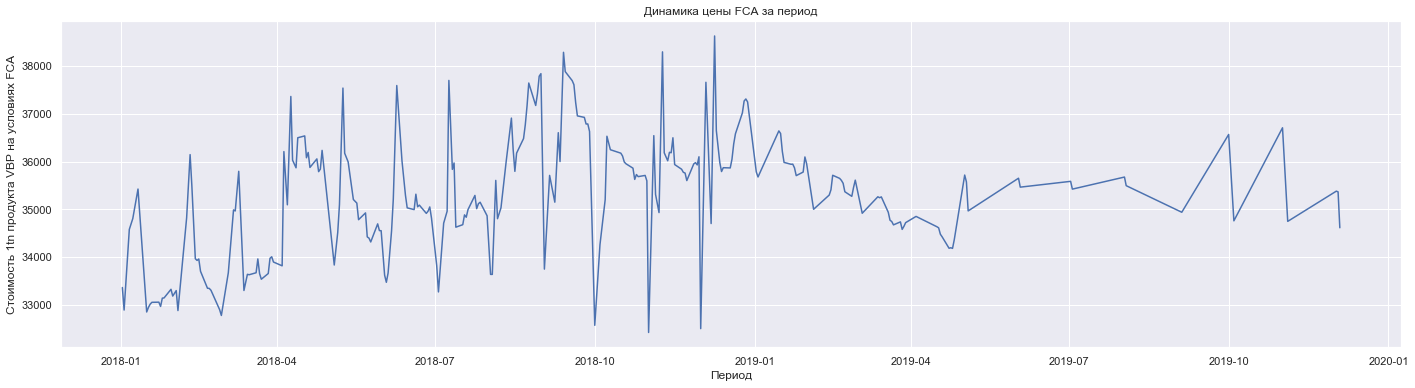

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 6))
#dbc_svod.plot(x="Date", y="FCA")
plt.plot(dbc_svod['Date'],dbc_svod['FCA'])
plt.title("Динамика цены FCA за период")
plt.xlabel('Период')
plt.ylabel('Стоимость 1tn продукта VBP на условиях FCA')

Text(0, 0.5, 'Курс ЕВРО/Котировки нефти')

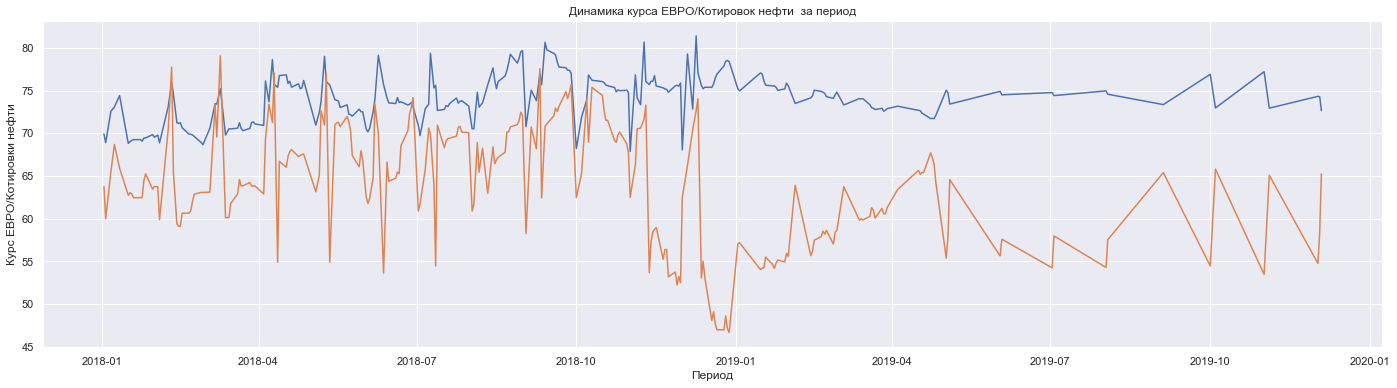

In [60]:
plt.figure(figsize=(24, 6))
plt.plot(dbc_svod['Date'],dbc_svod['curs EUR'])
plt.plot(dbc_svod['Date'],dbc_svod['OIL'])
plt.title("Динамика курса ЕВРО/Котировок нефти  за период")
plt.xlabel('Период')
plt.ylabel('Курс ЕВРО/Котировки нефти')

In [ ]:
#ДИНАМИЧЕСКИЙ БЛОК

In [ ]:
#Промежуточные расчеты для понимания

In [61]:
#Цена  DDP  поставка в Европу в  ретроспективе в разрезе дат
DDP_E(dbc_svod['FCA'],EU_LOGISTIC_COST_EUR,dbc_svod['curs EUR'])
dbc_svod['DDP']=DDP_E(dbc_svod['FCA'],EU_LOGISTIC_COST_EUR,dbc_svod['curs EUR'])
dbc_svod.head()

,Date,EURUSD=X,OIL,curs USD,curs EUR,FCA,DDP
13,2018-01-02,1.2419,63.77,56.1840,69.9322,33363.708,35461.674
29,2018-01-03,1.2191,60.00,56.3742,68.9062,32891.748,34958.934
77,2018-01-06,1.1693,65.50,62.0188,72.5806,34581.972,36759.390
109,2018-01-08,1.1690,68.70,62.3497,73.0738,34808.844,37001.058
162,2018-01-11,1.1317,65.93,65.5962,74.4189,35427.590,37660.157


In [62]:
#Цена  DDP  поставка в Китай в  ретроспективе в разрезе дат без учета дисконта

dbc_svod['DDP']=PRICE_DDP=DDP_CN(dbc_svod['FCA'],CN_LOGISTIC_COST_USD,dbc_svod['curs USD'])
dbc_svod.head()

,Date,EURUSD=X,OIL,curs USD,curs EUR,FCA,DDP
13,2018-01-02,1.2419,63.77,56.1840,69.9322,33363.708,40667.628
29,2018-01-03,1.2191,60.00,56.3742,68.9062,32891.748,40220.394
77,2018-01-06,1.1693,65.50,62.0188,72.5806,34581.972,42644.416
109,2018-01-08,1.1690,68.70,62.3497,73.0738,34808.844,42914.305
162,2018-01-11,1.1317,65.93,65.5962,74.4189,35427.590,43955.096


In [63]:
#БЛОК РАБОТЫ С ИНФОРМАЦИЕЙ ПО КЛИЕНТАМ В ВИДЕ СЛОВАРЯ ДЛЯ ИСПОЛЬЗОВАНИЯ В ЦИКЛЕ
customers


{'Monty': {'location': 'EU', 'volumes': 200, 'comment': 'moving_average'},
 'Triangle': {'location': 'CN', 'volumes': 30, 'comment': 'monthly'},
 'Stone': {'location': 'EU', 'volumes': 150, 'comment': 'moving_average'},
 'Poly': {'location': 'EU', 'volumes': 70, 'comment': 'monthly'},
 'Russian': {'location': 'RU', 'volumes': 10, 'comment': 'monthly'}}

In [64]:
customers.keys()

dict_keys(['Monty', 'Triangle', 'Stone', 'Poly', 'Russian'])

In [65]:
#Для выбора требуемых параметров по клиенту по ключу для использования в цикле
c_name=list(customers.keys())[4]
print(c_name)
c_data=customers[c_name]
print(c_data)
print(c_data['location'])
print(c_data ['volumes'] )
print(c_data ['comment'])

Russian
{'location': 'RU', 'volumes': 10, 'comment': 'monthly'}
RU
10
monthly


In [66]:
print(discounts)

{100: 0.01, 300: 0.05, 301: 0.1}


In [67]:
FCA_disc(dbc_svod['FCA'],discounts,c_data['volumes'])

13     33030.07092
29     32562.83052
77     34236.15228
109    34460.75556
162    35073.31410
          ...     
196    36344.60874
247    34402.55544
213    35030.23326
229    35014.43088
248    34270.07958
Name: FCA, Length: 257, dtype: float64

In [68]:
DDP_disc(dbc_svod['DDP'],discounts,c_data['volumes'])

13     40260.95172
29     39818.19006
77     42217.97184
109    42485.16195
162    43515.54504
          ...     
196    44949.55509
247    42734.24595
213    43479.60705
229    43518.45069
248    42558.24375
Name: DDP, Length: 257, dtype: float64

In [69]:
FCA_discont=FCA_disc(dbc_svod['FCA'],discounts,c_data['volumes'])
dbc_svod['PRICE_discont']=FCA_discont
dbc_svod.head()

,Date,EURUSD=X,OIL,curs USD,curs EUR,FCA,DDP,PRICE_discont
13,2018-01-02,1.2419,63.77,56.1840,69.9322,33363.708,40667.628,33030.07092
29,2018-01-03,1.2191,60.00,56.3742,68.9062,32891.748,40220.394,32562.83052
77,2018-01-06,1.1693,65.50,62.0188,72.5806,34581.972,42644.416,34236.15228
109,2018-01-08,1.1690,68.70,62.3497,73.0738,34808.844,42914.305,34460.75556
162,2018-01-11,1.1317,65.93,65.5962,74.4189,35427.590,43955.096,35073.31410


In [70]:
#Цикл. В разрезе каждого клиента из словаря по ключу customers.keys формируется таблица  dbc_svod:
#-формирует цену DDP в зависимости от вводных по клиенту-добавляет колонку 'DDP' в  таблицу dbc_svod по клиенту;
#-формирует дисконт по клиенту в зависимости от водных-добавляет колонку 'PRICE_discont'в  таблицу dbc_svod по клиенту; 
#-осуществляет экспорт в Excel  в отдельный файл по каждому клиенту

for c_name in customers.keys():
    c_data=customers[c_name]
    if c_data['location']=='EU':
        dbc_svod['DDP']=DDP_E(dbc_svod['FCA'],EU_LOGISTIC_COST_EUR,dbc_svod['curs EUR'])
    elif c_data['location']=='CN':
               
        dbc_svod['DDP']=DDP_CN(dbc_svod['FCA'],CN_LOGISTIC_COST_USD,dbc_svod['curs USD'])
    elif c_data['location']=='RU':
        dbc_svod['DDP']=dbc_svod['FCA'] #*
    
#     if c_data['location']=='EU' or c_data['location']=='CN':
#         dbc_svod['PRICE_discont']=DDP_disc(dbc_svod['DDP'],discounts,c_data['volumes'])
#     elif c_data['location']=='RU':
#         dbc_svod['PRICE_discont']=FCA_disc(dbc_svod['FCA'],discounts,c_data['volumes'])
    dbc_svod['PRICE_discont']=DDP_disc(dbc_svod['DDP'],discounts,c_data['volumes'])
    dbc_svod.to_excel(c_name+".xlsx", sheet_name=c_name)      

In [ ]:
#*  по клиенту RU цена  DDP==FCA  так, как у клиента  RU отсутствуют расходы по логистике.

In [ ]:
#БЛОК ПРОВЕРОК

In [71]:
RAW_MAT
dbc
PRODUCTION_COST
K_EUR
NP
 
FCA(RAW_MAT,dbc,PRODUCTION_COST,K_EUR,NP)
res1=FCA(RAW_MAT,dbc,PRODUCTION_COST,K_EUR,NP)
print(round(res1,1))

assert round(res1,1)==34355.5, 'Error calculation FCA'

34355.5


In [72]:
dbc_df.shape
assert dbc_df.shape==(346, 3), 'Error shape tab dbc_df'

In [ ]:
#БЛОК ЭКСПОРТА ДАННЫХ ПОЙДЕТ В ЦИКЛ
#ЭКСПОРТ В EXCEL

In [55]:
dbc_svod.to_excel(c_name+".xlsx", sheet_name=c_name)  

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(w, h))

In [68]:
customers

{'Monty': {'location': 'EU', 'volumes': 200, 'comment': 'moving_average'},
 'Triangle': {'location': 'CN', 'volumes': 30, 'comment': 'monthly'},
 'Stone': {'location': 'EU', 'volumes': 150, 'comment': 'moving_average'},
 'Poly': {'location': 'EU', 'volumes': 70, 'comment': 'monthly'},
 'Russian': {'location': 'RU', 'volumes': 10, 'comment': 'monthly'}}

In [69]:
customers.keys()

dict_keys(['Monty', 'Triangle', 'Stone', 'Poly', 'Russian'])

In [70]:
c_name=list(customers.keys())[1]
c_name

'Triangle'

In [71]:
c_data=customers[c_name]
c_data

{'location': 'CN', 'volumes': 30, 'comment': 'monthly'}

In [72]:
c_data['location']

'CN'

In [72]:
c_data['volumes']

30

In [75]:
c_data['comment']

'monthly'

In [76]:
for c_name in customers.keys():
   # print(c_name)
    c_data=customers[c_name]
    print(c_name,c_data['location'])

Monty EU
Triangle CN
Stone EU
Poly EU
Russian RU


In [77]:
PRICE=PRICE_FCA
PRICE=PRICE_DDP_CN
PRICE_DDP_E
PRICE=[]
for c_name in customers.keys():
   # print(c_name)
    c_data=customers[c_name]
    if(c_data['location'])==EU:
        PRICE=PRICE_DDP_E
    if(c_data['location'])==CN:
        PRICE=PRICE_DDP_CN
    if(c_data['location'])==RU: 
        PRICE=PRICE_FCA
        
print(PRICE)       

NameError: name 'EU' is not defined

In [78]:
PRICE=[]
for c_name in customers.keys():
   # print(c_name)
    c_data=customers[c_name]
    if(c_data['volumes'])<=discounts.keys()[0] :
        PRICE=PRICE*discounts.values()[0]
    if(c_data['volumes'])>discounts.keys()[0] and (c_name,c_data['volumes'])<=discounts.keys()[1]:
        PRICE=PRICE*discounts.values()[1]

    if(c_data['volumes'])>discounts.keys()[2]: 
        PRICE=PRICE*discounts.values()[2]

TypeError: 'dict_keys' object is not subscriptable

### Что нужно сделать?

1. Проанализировать имеющиеся данные.
2. Определить базовую формулу цены на условиях FCA (цена на заводе). То есть как бы выглядела цена на исторических данных.
3. Отобразить на графике.
4. Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
5. Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
- Создать директорию «для клиентов» и в ней сложить  файлы с расчетами.
- Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf)  с именем клиента… 

### В результате должно быть 3 файла:
1. Ноутбук с расчетами и графиками. 
2. Скрипт, который делает расчет цены для каждого клиента в одном файле
2. Скрипт, который делает расчет цены для каждого клиента в отельном файле

In [ ]:
# 

# Задание 2. Продолжение

Клиенты согласились на ваше предложение. 
Вам нужно сделать написать скрипт, с помощью которого можно автоматом рассчитывать цены для всех клиентов одновременно. 
Важный момент: данные для расчета скрипт должен подтягивать сам.

В результате должно быть 3 файла
1. Ноутбук с расчетами и графиками (чтобы данные подтягивались туда)
2. Скрипт, который делает расчет цены для клиента (чтобы данные подтягивались туда сами)

In [ ]:
# 

# Задание 3. Back to Russia

К вам пришел новый клиент из России. Который использует продукт А и готов регулярно закупать ВБП для того, чтобы не быть привязанным к одному поставщику. Клиент готов забирать ВБП с завода самостоятельно.
1. На основе тех данных, которые уже есть предложите цену новому клиенту. 
2. Подготовьте скрипт, который будет использовать курс публикуемый на <a href='http://www.cbr.ru/currency_base/dynamics/'> сайте ЦБ РФ</a>.


In [ ]:
# 

# Задание 4. Check it

* Подумайте, как можно проверить корректность работы алгоритма? 
* Какие возможны ошибки?
* Придумайте тесты для проверки возможных ошибок алгоритма
* Интергрируйте их в свои скрипты в виде исключений


In [ ]:
# 

# Задание 5. Поделись с ближним

Вы решили пойти в отпуск на время вашего отсутствия вас будет заменять коллега. Он будет заниматься рассчетом цен для клиентов. Чтобы ему было проще вам нужно завернуть ваши скрипты в модуль, который будет запускать у себя коллега.

* Создайте модуль, который можно запускать в ноутбуке подкладывая в ту же директорию
* Хорошенько задокументируйте ВСЁ, но помните о PEP8

In [ ]:
# import yourpackage

# Задание 6. Поделись пакетом

Ваши коллеги узнали, что вы быстро рассчитываете цены для формульных контрактов, и решили использовать такую же практику для своих продуктов и клиентов. Вам нужно создать пакет, чтобы его было проще устанавливать и использовать.

* Создайте отдельный пакет, который можно устанавливать с помощью pip 
* В пакете должны быть реализованы функции для рассчета цен по формульным контрактам
* Выложите пакет в репозиторий

In [80]:
!pip install yourpackage
import yourpackage

  ERROR: Could not find a version that satisfies the requirement yourpackage (from versions: none)
ERROR: No matching distribution found for yourpackage


ModuleNotFoundError: No module named 'yourpackage'